<a href="https://colab.research.google.com/github/shubhm01/BusinessAnalytics_TSF-5/blob/main/EDA_TASK5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 5 - To Explore Business Analytics**
**Performing 'Exploratory Data Analysis' on the provided dataset**



**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
%matplotlib inline

**Loading the Dataset**

In [ ]:
mydata=pd.read_csv("SampleSuperstore.csv")

**Reading first 5 values**

In [ ]:
mydata.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Reading last 5 values**

In [ ]:
mydata.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


**Identifying Rows and Columns**

In [ ]:
mydata.shape

(9994, 13)

In [ ]:
mydata.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
mydata.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
mydata.isnull().sum()  #returns column-wise sum of missing values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
mydata['Region'].value_counts()  #returns count of unique values

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [ ]:
mydata.duplicated().sum()  #helps in analyzing duplicate values

17

In [ ]:
mydata=mydata.drop(['Postal Code'],axis=1)  #
mydata=mydata.drop(['Country'],axis=1)

In [ ]:
mydata.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


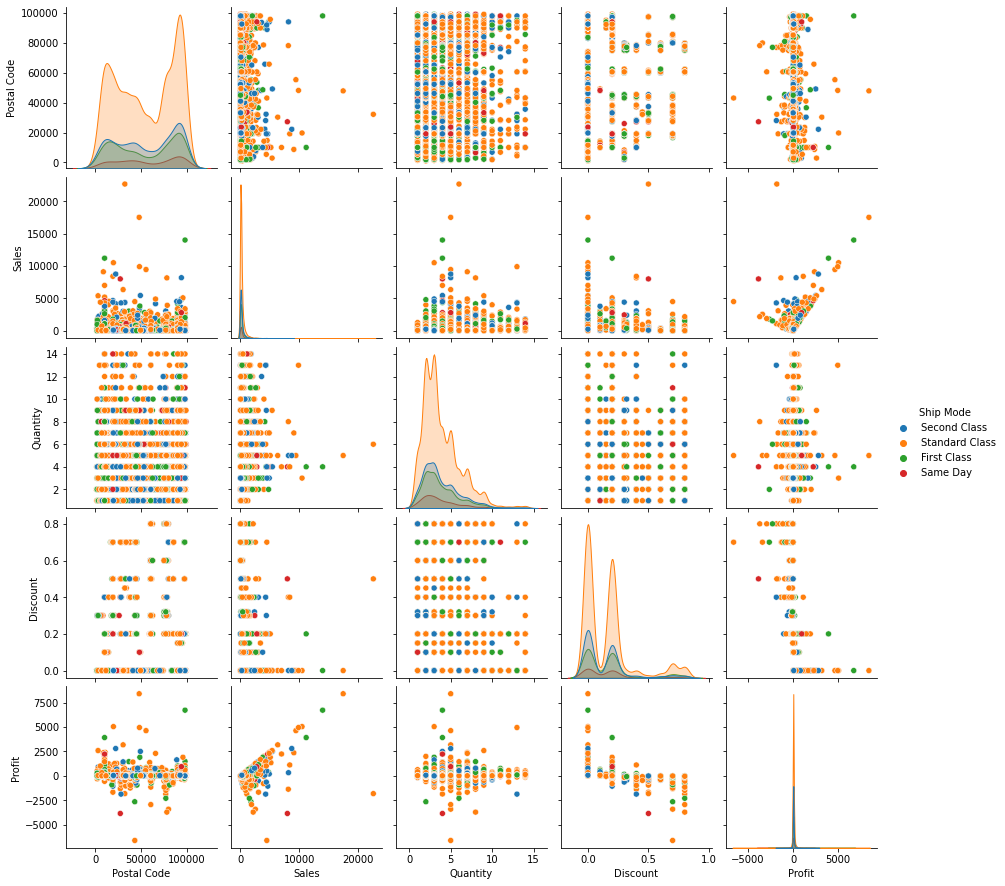

In [ ]:
sns.pairplot(mydata, hue="Ship Mode")  # to plot multiple pairwise bivariate distributions


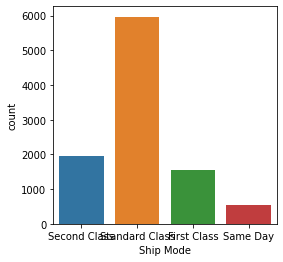

In [ ]:
plt.figure(figsize=(4,4))    #Analysing of shipping mode
sns.countplot(x=mydata['Ship Mode'])
plt.show()


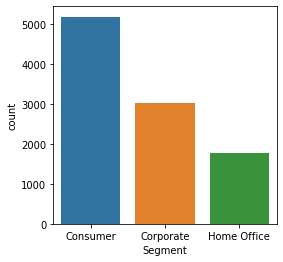

In [ ]:
plt.figure(figsize=(4,4))  #Analysing of Segments
sns.countplot(x=mydata['Segment'])
plt.show()

In [ ]:
mydata['City'].value_counts()  #returns count of unique values

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Port Orange          1
Missoula             1
Murrieta             1
La Quinta            1
Rochester Hills      1
Name: City, Length: 531, dtype: int64

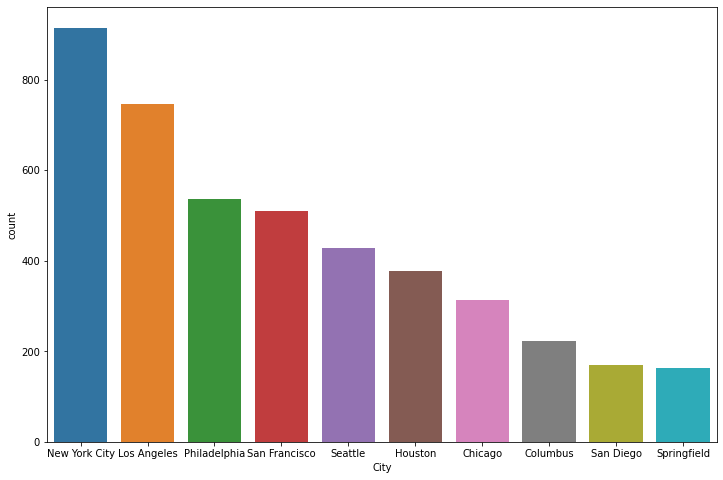

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x=mydata['City'],order=(mydata["City"].value_counts().head(10)).index)
plt.show()

In [ ]:
dftop10 = mydata.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=True)
dftop10  #Grouping by Quantity of Cities

,City,Quantity
386,Port Orange,1
259,Littleton,1
257,Lindenhurst,1
140,Elyria,1
213,Iowa City,1
...,...,...
452,Seattle,1590
438,San Francisco,1935
374,Philadelphia,1981
266,Los Angeles,2879


In [ ]:
dftop10 = dftop10.head(10)  #Most ordering cities
dftop10.reset_index(drop=True,inplace=True)
dftop10

,City,Quantity
0,Port Orange,1
1,Littleton,1
2,Lindenhurst,1
3,Elyria,1
4,Iowa City,1
5,Jupiter,1
6,Keller,2
7,Grand Island,2
8,Baytown,2
9,Holyoke,2


Text(0, 0.5, 'Quantities ordered')

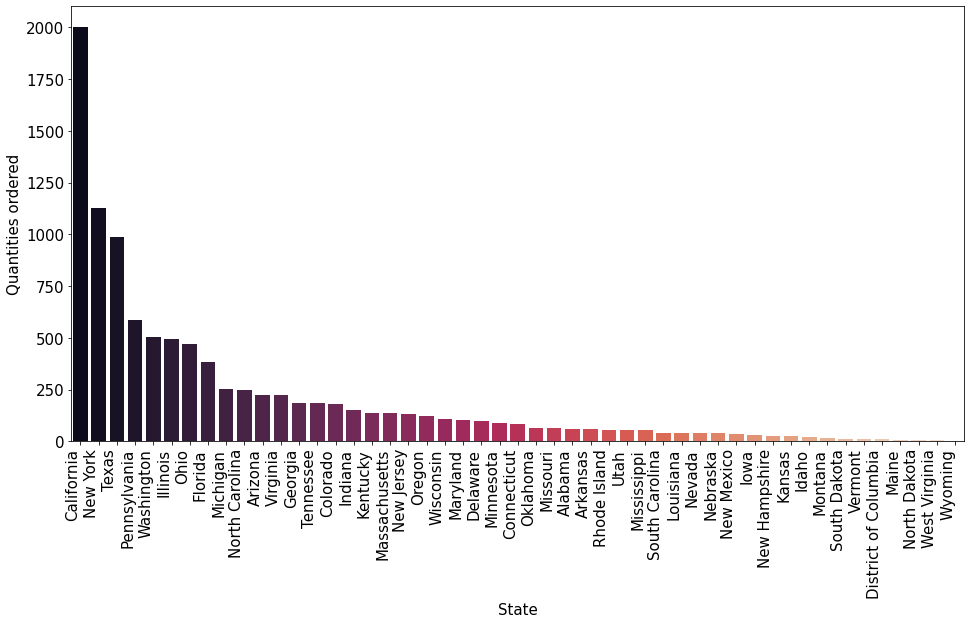

In [ ]:
plt.figure(figsize = (16, 8))  #Locationwise analysis
sns.countplot(x = mydata['State'],palette = 'rocket', order = (mydata['State'].value_counts().head(50)).index)
plt.xticks(rotation=90,ha='right',fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Quantities ordered',fontsize=15)

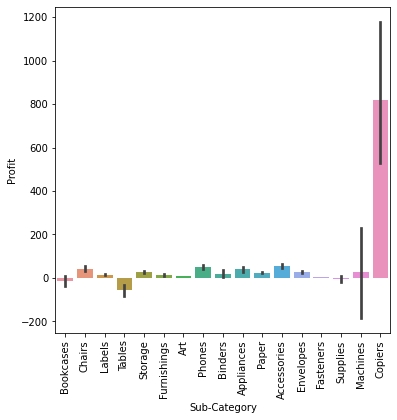

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x=mydata['Sub-Category'], y=mydata['Profit'])
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(-4.575000000000003, 0.5, 'Profit')

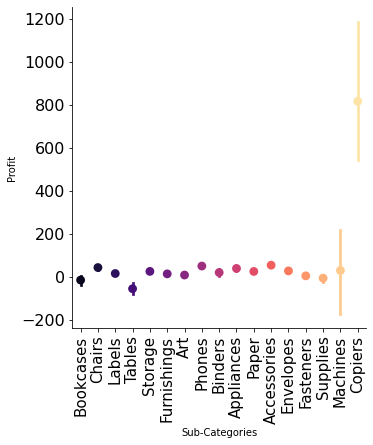

In [ ]:
sns.factorplot('Sub-Category','Profit',data=mydata,palette='magma')
plt.xticks(rotation=90,size=15)
plt.yticks(size=16)
plt.xlabel('Sub-Categories')
plt.ylabel('Profit')

**VOILA! DATA FOR A SUPERSTORE HAS BEEN ANALYSED.**


**TASK 5 COMPLETED** 

